<a href="https://colab.research.google.com/github/SainaAntonova/yolo/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22yolo_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt # install
!pip install roboflow

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="O4YE7O6CM1dw0IJ5CvRS")
project = rf.workspace("vervelvel").project("-20-classes")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to "20-Classes"-1 in yolov5pytorch:: 100%|██████████| 3432/3432 [00:00<00:00, 5483.03it/s]


In [ ]:
! python train.py --img 640 --batch 16 --epochs 50 --data /content/yolov5/Classes_1/data.yaml --weights yolov5s.pt --cache

2024-05-21 14:41:11.704013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 14:41:11.704062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 14:41:11.705483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Classes_1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False

In [ ]:
from torchvision import transforms as T
model = torch.hub.load(
    repo_or_dir = '.', # будем работать с локальной моделью в текущей папке
    model = 'custom', # непредобученная
    path='/content/yolov5/runs/train/exp9/weights/best.pt', # путь к нашим весам
    source='local' # откуда берем модель – наша локальна
    )

YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


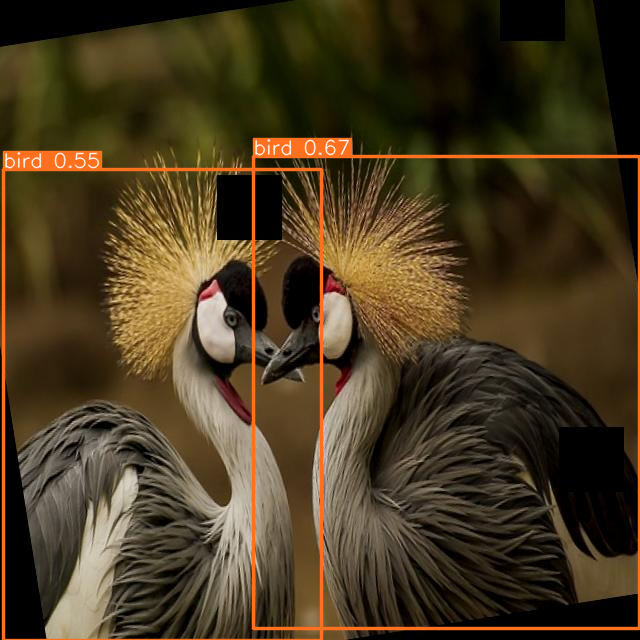

In [ ]:
model.conf = 0.5 # устанавливаем порог
# Image
# paths /content/yolov5/imgs/image1.jpg
img = T.ToPILImage()(read_image('/content/yolov5/Classes_1/train/images/032_grey-crowned-cranes-540657_640_jpg.rf.0e9065394765d66c8e058f598246f457.jpg'))
model.eval()
# Inference
results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), etc
results.show()